# DSAPP Application
#### Stephen Gianfortoni

## Packages and Data

In [1]:
##import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, confusion_matrix, log_loss, roc_curve

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
## data sets

donations = pd.read_table('C:/Users/gianf/Documents/Projects/DSPP Application/donations.csv', sep=',')
projects = pd.read_table('C:/Users/gianf/Documents/Projects/DSPP Application/projects.csv', sep=',')
resources = pd.read_table('C:/Users/gianf/Documents/Projects/DSPP Application/resources.csv', sep=',')

## Exploratory Data Analysis

### Donations Table

In [3]:
donations.head()

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,...,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.0,f,2011-08-25 14:27:34.807,42.50,7.50,...,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...
1,fcfedba1c8a0ba77d280cace80a909f6,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,...,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Ge...
2,3fa95d29986aa6f401c6719ced3a3ce7,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.0,f,2011-11-02 22:53:53.019,55.35,0.00,...,10_to_100,f,no_cash_received,t,f,f,f,t,f,The Spark's 'pet' projects include those which...
3,020ad6bd5e88a35741d23b5e08f8b8e8,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.0,f,2011-11-03 23:54:01.109,8.50,1.50,...,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is im...
4,4b44b03f304d6425ae94446686f93cd6,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.0,f,2011-11-02 23:21:00.043,20.00,0.00,...,10_to_100,f,no_cash_received,f,f,t,f,t,f,I lent a paw to help the children in this clas...


In [4]:
pd.options.display.float_format = '{:20,.2f}'.format
donations.describe()

,donor_zip,donation_to_project,donation_optional_support,donation_total
count,"1,385,927.00","3,097,989.00","3,097,989.00","3,097,989.00"
mean,"50,664.94",65.95,10.73,76.68
std,"33,314.68",237.90,36.88,270.49
min,0.00,-12.75,-2.25,-15.00
25%,"20,003.00",10.00,1.50,10.00
50%,"46,714.00",21.25,3.75,25.00
75%,"89,521.00",50.00,7.50,56.11
max,"99,999.00","147,204.00","21,996.00","169,200.00"


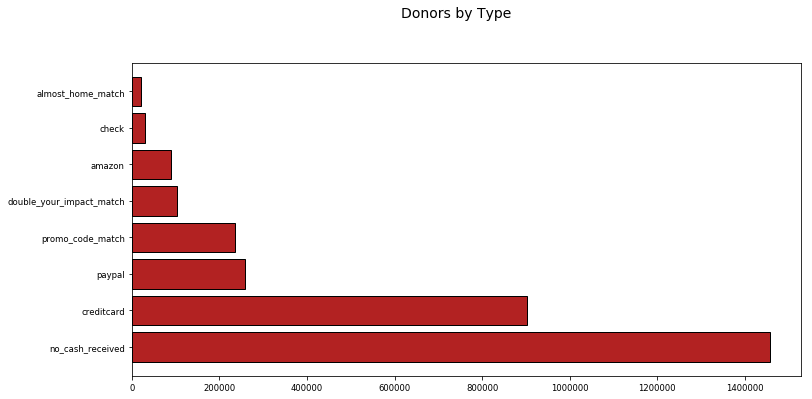

In [5]:
## Payment by Methods Chart

fig = plt.figure(figsize = (12,6))
title = fig.suptitle("Donors by Type", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel = ("Number of Donors")
ax.set_xlabel = ("Payment Method")
d_c = donations['payment_method'].value_counts()
d_c = (list(d_c.values),list(d_c.index))
ax.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar = ax.barh(d_c[1], d_c[0], color = 'firebrick',
            edgecolor = 'black', linewidth = 1)


The fact that 'no cash received' is by far the largest group is somewhat concerning. I'm unable to find a detailed reference on what exactly it means on Kaggle. It could refer to someone who signed up on the site and never actually donated, which would be a bad sign, or perhaps that the payment was in the form of a gift card of some sort.

In [6]:
donations_no_cash = donations[donations.payment_method == 'no_cash_received']
donations_no_cash.describe()

,donor_zip,donation_to_project,donation_optional_support,donation_total
count,"518,025.00","1,456,247.00","1,456,247.00","1,456,247.00"
mean,"50,970.98",59.67,9.68,69.35
std,"33,038.69",278.33,42.30,314.65
min,0.00,-12.75,-2.25,-15.00
25%,"20,171.00",8.50,1.35,10.00
50%,"46,278.00",17.00,2.25,20.00
75%,"90,015.00",35.00,4.50,40.00
max,"99,999.00","85,680.01","15,120.00","100,800.01"


Looking at just the donors with the No Cash Received status, I still have some concerns. There appears to be a large amount of donors pledging between $10-$40 that have not actually paid anything. If my interpretation of this status is correct, Donors Choose is leaving close to $3 million on the table by not converting these pledges into actual payments.

Again, it is certainly possible that this just refers to an alternate form of payment, but I'm not sure what it would be if it isn't cash, card, check, amazon payment, or paypal.

### Projects Table

In [7]:
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,"63,627,006,187.00",36.58,-119.61,Selma,CA,"93,662.00",NaN,...,Books,highest poverty,Grades 6-8,30.00,555.81,653.89,32.00,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,"483,702,008,193.00",32.91,-96.72,Dallas,TX,"75,243.00",urban,...,Books,highest poverty,Grades PreK-2,30.00,296.47,348.79,22.00,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,"410,327,000,109.00",45.17,-122.41,Colton,OR,"97,017.00",rural,...,Technology,high poverty,Grades PreK-2,30.00,430.89,506.93,17.00,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,"360,015,302,507.00",40.64,-73.97,Brooklyn,NY,"11,226.00",urban,...,Books,highest poverty,Grades 3-5,30.00,576.07,677.73,12.00,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,"62,271,003,157.00",34.04,-118.29,Los Angeles,CA,"90,006.00",urban,...,Other,highest poverty,Grades PreK-2,30.00,408.40,480.47,24.00,f,f,2014-05-11


In [8]:
projects['total_price_excluding_optional_support'].describe()
projects['students_reached'].describe()

count             663,952.00
mean                   97.23
std                 2,283.33
min                     0.00
25%                    22.00
50%                    30.00
75%                   100.00
max               999,999.00
Name: students_reached, dtype: float64

Several Initial plots showed a very large skew for a variety of columns in the projects table. Are these valid numbers?

In [9]:
## Density of payment requests

projects.loc[[projects['students_reached'].idxmax()]]

projects.loc[[projects['total_price_excluding_optional_support'].idxmax()]]


,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
532252,8ec6ef94555d01ede69ab3785aba8c40,8b0c1d11b3d14836db5383d8196e8de7,4e58780defc1353bd1c33998ccaa775f,"360,008,102,462.00",40.81,-73.96,New York,NY,"10,027.00",urban,...,Other,highest poverty,Grades PreK-2,17.00,"10,250,017.00","12,500,020.73",1.00,f,f,2009-04-09


In [10]:
resources.loc[resources['projectid'] == '8ec6ef94555d01ede69ab3785aba8c40']
resources.loc[resources['projectid'] == '65b3d124554b1a5187e3680609d70655']

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
2210701,bc88f6a02afa840ebae969740af9d166,65b3d124554b1a5187e3680609d70655,nan,NaN,Other,NaN,NaN,nan,nan


The top two priced items to be a test items and should be removed from the data

In [11]:
resources = resources.loc[resources['projectid'] != '8ec6ef94555d01ede69ab3785aba8c40']
resources = resources.loc[resources['projectid'] != '65b3d124554b1a5187e3680609d70655']

In [12]:
projects = projects.loc[projects['projectid'] != '8ec6ef94555d01ede69ab3785aba8c40']
projects = projects.loc[projects['projectid'] != '65b3d124554b1a5187e3680609d70655']

In [13]:
projects.loc[[projects['total_price_excluding_optional_support'].idxmax()]]

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
623935,d6ef27c07c30c81f0c16c32b6acfa2ff,b1eb37123f9fbcaf3494530f5708db75,efaf145b094121be87a4072686bb2ee8,"480,771,000,084.00",29.93,-95.48,Houston,TX,"77,086.00",suburban,...,Technology,highest poverty,Grades 6-8,17.00,"437,212.00","533,185.37","1,100.00",f,f,2007-02-23


In [14]:
resources.loc[resources['projectid'] == 'd6ef27c07c30c81f0c16c32b6acfa2ff']

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
583968,41f69e5021bbd7d76add67d6f99556ea,d6ef27c07c30c81f0c16c32b6acfa2ff,150.00,CDW-G,Technology,Toshiba Tecra A8-EZ8412,1066435,925.28,420.00


### Project Price Details

Box plot of project prices

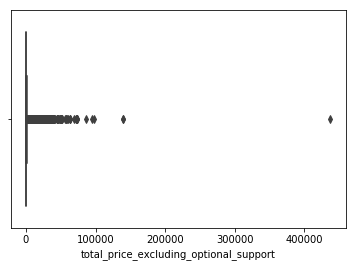

In [15]:
sns.boxplot(projects.total_price_excluding_optional_support)

The cost data is still heavily skewed to the right. Converting to a log model will likely reduce this and help make the data more interpretable.

In [16]:
projects['log_price'] = np.log(projects.total_price_excluding_optional_support)

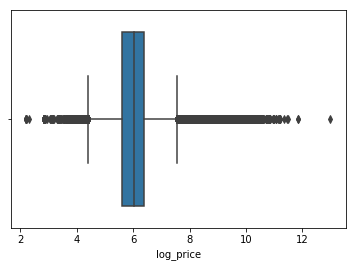

In [17]:
sns.boxplot(projects.log_price)

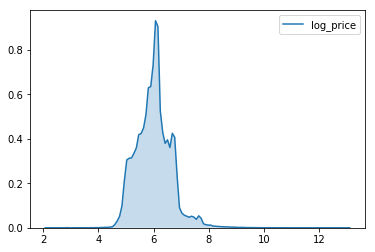

In [18]:
sns.kdeplot(projects.log_price, shade = True)

The two plots show that the price for nearly all the projects fall between 4 and 8 on a log scale. Scaled on the log scale, the price dat appears to be somewhat platykurtic.

Subsetting the data based on these cut off points shows that the price can be expected to generally fall in the range below, between 50-3000 dollars, with and average of a little bit less than 500 dollars.

Intuitively this appears to be a much more reasonable range of what would be expected for an achievable goal for the types of donation requests that this site is known for. The data is still skewed, but the drastically large values have been cut out.

In [19]:
projects_subset = projects[(projects['log_price'] >= 4) & 
                           (projects['log_price'] <= 8)]

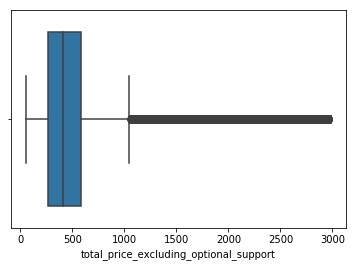

In [20]:
sns.boxplot(projects_subset.total_price_excluding_optional_support)

### Students

In [21]:
projects.students_reached.describe()

count             663,950.00
mean                   97.23
std                 2,283.33
min                     0.00
25%                    22.00
50%                    30.00
75%                   100.00
max               999,999.00
Name: students_reached, dtype: float64

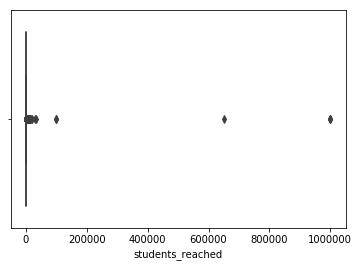

In [22]:
sns.boxplot(projects.students_reached)

In [23]:
projects['students_reached'].loc[[projects['students_reached'].idxmax()]]

480275             999,999.00
Name: students_reached, dtype: float64

In [24]:
resources.loc[resources['projectid'] == 'b76d5c8f207efad0b04993383d2cd33a']
resources.loc[resources['projectid'] == '42fe34fa58e80d20adba759b6e819a93']

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
2711686,50db515e0cc6133569181394038e16b8,42fe34fa58e80d20adba759b6e819a93,82.00,Best Buy for Business,Technology,BOSE CORP 006 COMPANION 5 E1 7996403,7996403,399.99,1.00
2711687,89daa33737af67f6ffb90ffd20d16021,42fe34fa58e80d20adba759b6e819a93,178.00,Quill.com,Technology,EPSON MULTIMEDIA PROJECTOR -- EPSON EX70 Digi...,187-EX70,719.99,1.00


The values of 999,999 students reached is way to high, and is likely a placeholder, and we will reset to be the median value

In [25]:
med_student = projects.students_reached.median()

In [27]:
projects.students_reached.replace(999999, med_student, inplace = True)
projects.students_reached.replace(0, med_student, inplace = True)
projects.students_reached.fillna(med_student, inplace = True)

In [28]:
projects.students_reached.describe()

count             664,096.00
mean                   92.83
std                   834.19
min                     1.00
25%                    22.00
50%                    30.00
75%                   100.00
max               650,250.00
Name: students_reached, dtype: float64

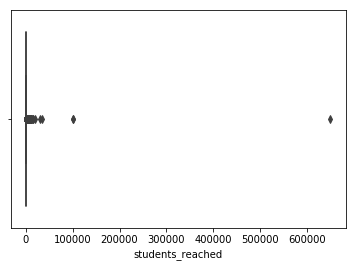

In [29]:
sns.boxplot(projects.students_reached)

In [30]:
projects.loc[[projects['students_reached'].idxmax()]]

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,log_price
578089,5a08334b6b2f0bf80a3da3abe265ca21,fdd63613c04e076a64cb4daaabb80ec1,e75c3015a489de0bad6a4a5648dcdd5c,"220,117,000,926.00",29.94,-90.12,New Orleans,LA,"70,118.00",urban,...,moderate poverty,Grades 3-5,17.00,590.00,719.51,"650,250.00",f,f,2008-04-18,6.38


In [31]:
resources.loc[resources['projectid'] == '5a08334b6b2f0bf80a3da3abe265ca21']

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
2379404,2d8ca68d4e47b9ba728312d2a2ea03a4,5a08334b6b2f0bf80a3da3abe265ca21,752.00,Nasco,Supplies,Kaleid-A-Color Hand-Sewn Soccer Balls - Size 3...,PE02818E,46.26,5.00
2379405,86747b3ea551b33db9fb62f75175d087,5a08334b6b2f0bf80a3da3abe265ca21,183.00,Cannon Sports,Supplies,PVC SOCCER GOAL [7' W X 5.5' H X 40'' D],49005,130.09,2.00


The new max still appears to be off in terms of students reached

In [32]:
projects.students_reached.replace(650250, med_student, inplace = True)

In [33]:
projects.students_reached.describe()

count             664,096.00
mean                   91.85
std                   243.65
min                     1.00
25%                    22.00
50%                    30.00
75%                   100.00
max               100,000.00
Name: students_reached, dtype: float64

The rest of students will be log scale rather than go through every possible number.

In [34]:
projects['log_students'] = np.log(projects.students_reached)

In [35]:
projects.log_students.head()

0                   3.47
1                   3.09
2                   2.83
3                   2.48
4                   3.18
Name: log_students, dtype: float64

### Poverty Level Details

Poverty level appears to be another potential candidate for a dummy variable. My hypothesis is that it may affect the ability to gain funding as schools with a lower poverty rate will have a higher support network, or that those in the highest poverty level may garner more sympathetic support.

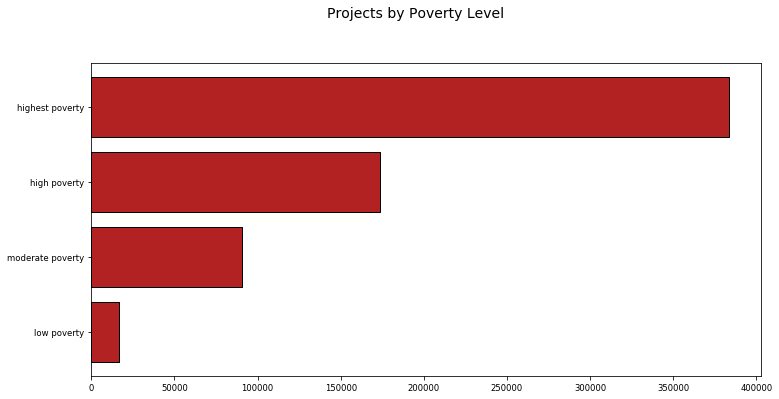

In [36]:
## Projects by Poverty Level

fig = plt.figure(figsize = (12,6))
title = fig.suptitle("Projects by Poverty Level", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel = ("Number of Projects")
ax.set_xlabel = ("Poverty Level")
group_counts = projects.groupby("poverty_level").agg({"projectid": pd.Series.nunique})
group_counts.index.name = 'poverty_level'
group_counts.sort_values(['projectid'], inplace = True)
group_counts.reset_index(inplace = True)
group_counts = (list(group_counts.poverty_level),list(group_counts.projectid))
ax.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar = ax.barh(group_counts[0], group_counts[1], color = 'firebrick',
            edgecolor = 'black', linewidth = 1)

In [37]:
pov_dummy = pd.get_dummies(projects['poverty_level'])
pov_dummy.head()

,high poverty,highest poverty,low poverty,moderate poverty
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [38]:
projects = pd.concat([projects, pov_dummy], axis = 1)
projects.rename(index=str, columns={"high poverty": "high_poverty", "highest poverty": "highest_poverty",
                                    "low poverty": "low_poverty", "moderate poverty": "moderate_poverty"},
                inplace = True)
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,log_price,log_students,high_poverty,highest_poverty,low_poverty,moderate_poverty
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,"63,627,006,187.00",36.58,-119.61,Selma,CA,"93,662.00",NaN,...,32.00,f,f,2014-05-12,6.32,3.47,0,1,0,0
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,"483,702,008,193.00",32.91,-96.72,Dallas,TX,"75,243.00",urban,...,22.00,f,f,2014-05-12,5.69,3.09,0,1,0,0
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,"410,327,000,109.00",45.17,-122.41,Colton,OR,"97,017.00",rural,...,17.00,f,f,2014-05-11,6.07,2.83,1,0,0,0
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,"360,015,302,507.00",40.64,-73.97,Brooklyn,NY,"11,226.00",urban,...,12.00,f,f,2014-05-11,6.36,2.48,0,1,0,0
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,"62,271,003,157.00",34.04,-118.29,Los Angeles,CA,"90,006.00",urban,...,24.00,f,f,2014-05-11,6.01,3.18,0,1,0,0


### Resource Type Details
The resource type categorizes the project, and can be made into a dummy variable.

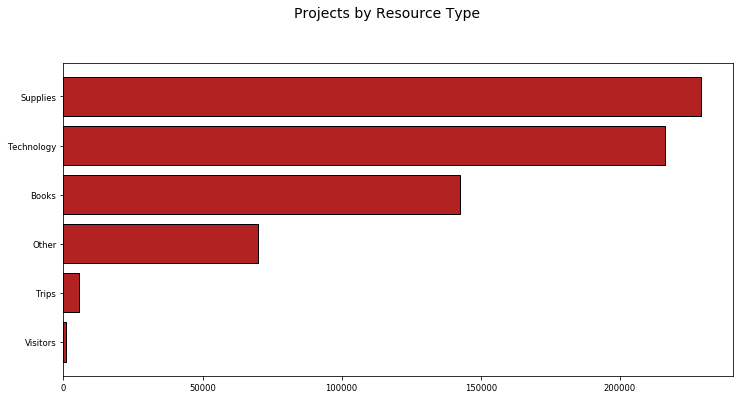

In [39]:
## Projects by Resource Type

fig = plt.figure(figsize = (12,6))
title = fig.suptitle("Projects by Resource Type", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel = ("Number of Projects")
ax.set_xlabel = ("Resource Type")
group_counts = projects.groupby("resource_type").agg({"projectid": pd.Series.nunique})
group_counts.index.name = 'resource_type'
group_counts.sort_values(['projectid'], inplace = True)
group_counts.reset_index(inplace = True)
group_counts = (list(group_counts.resource_type),list(group_counts.projectid))
ax.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar = ax.barh(group_counts[0], group_counts[1], color = 'firebrick',
            edgecolor = 'black', linewidth = 1)

In [40]:
rtype_dummy = pd.get_dummies(projects['resource_type'])
rtype_dummy.head()

,Books,Other,Supplies,Technology,Trips,Visitors
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [41]:
projects = pd.concat([projects, rtype_dummy], axis = 1)
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,high_poverty,highest_poverty,low_poverty,moderate_poverty,Books,Other,Supplies,Technology,Trips,Visitors
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,"63,627,006,187.00",36.58,-119.61,Selma,CA,"93,662.00",NaN,...,0,1,0,0,1,0,0,0,0,0
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,"483,702,008,193.00",32.91,-96.72,Dallas,TX,"75,243.00",urban,...,0,1,0,0,1,0,0,0,0,0
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,"410,327,000,109.00",45.17,-122.41,Colton,OR,"97,017.00",rural,...,1,0,0,0,0,0,0,1,0,0
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,"360,015,302,507.00",40.64,-73.97,Brooklyn,NY,"11,226.00",urban,...,0,1,0,0,1,0,0,0,0,0
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,"62,271,003,157.00",34.04,-118.29,Los Angeles,CA,"90,006.00",urban,...,0,1,0,0,0,1,0,0,0,0


### Grade Level Details
The Grade Level shows what grade the project is intended to support.

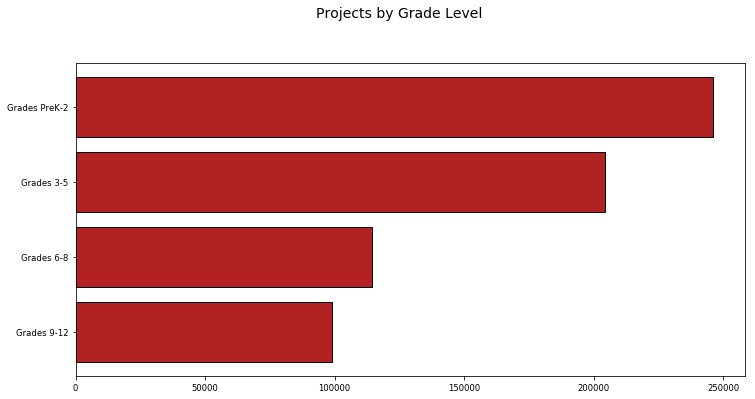

In [42]:
## Projects by Grade Level

fig = plt.figure(figsize = (12,6))
title = fig.suptitle("Projects by Grade Level", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel = ("Number of Projects")
ax.set_xlabel = ("Grade Level")
group_counts = projects.groupby("grade_level").agg({"projectid": pd.Series.nunique})
group_counts.index.name = 'grade_level'
group_counts.sort_values(['projectid'], inplace = True)
group_counts.reset_index(inplace = True)
group_counts = (list(group_counts.grade_level),list(group_counts.projectid))
ax.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar = ax.barh(group_counts[0], group_counts[1], color = 'firebrick',
            edgecolor = 'black', linewidth = 1)

In [43]:
grade_dummy = pd.get_dummies(projects['grade_level'])
grade_dummy.head()

,Grades 3-5,Grades 6-8,Grades 9-12,Grades PreK-2
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [44]:
projects = pd.concat([projects, grade_dummy], axis = 1)
projects.rename(index=str, columns={"Grades 3-5": "Grades_3_5", "Grades 6-8": "Grades_6_8",
                                    "Grades 9-12": "Grades_9_12", "Grades PreK-2": "Grades_PreK_2"},
                inplace = True)
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,Books,Other,Supplies,Technology,Trips,Visitors,Grades_3_5,Grades_6_8,Grades_9_12,Grades_PreK_2
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,"63,627,006,187.00",36.58,-119.61,Selma,CA,"93,662.00",NaN,...,1,0,0,0,0,0,0,1,0,0
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,"483,702,008,193.00",32.91,-96.72,Dallas,TX,"75,243.00",urban,...,1,0,0,0,0,0,0,0,0,1
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,"410,327,000,109.00",45.17,-122.41,Colton,OR,"97,017.00",rural,...,0,0,0,1,0,0,0,0,0,1
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,"360,015,302,507.00",40.64,-73.97,Brooklyn,NY,"11,226.00",urban,...,1,0,0,0,0,0,1,0,0,0
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,"62,271,003,157.00",34.04,-118.29,Los Angeles,CA,"90,006.00",urban,...,0,1,0,0,0,0,0,0,0,1


###  Resources Table

In [45]:
resources.describe()

,vendorid,item_unit_price,item_quantity
count,"3,558,948.00","3,653,322.00","3,658,906.00"
mean,423.67,177.10,3.31
std,354.63,"234,608.39",519.31
min,1.00,-99.60,0.00
25%,27.00,6.29,1.00
50%,752.00,13.98,1.00
75%,767.00,36.00,2.00
max,"1,020.00","448,421,569.00","993,108.00"


In [46]:
resources.head()

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.00,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.00
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.00,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1.00
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.00
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1.00
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.00


In [47]:
resources['total_item_price'] = resources.item_unit_price * resources.item_quantity

In [48]:
resources.head()

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity,total_item_price
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.00,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.00,596.00
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.00,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1.00,148.00
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.00,69.95
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1.00,34.95
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.00,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.00,43.80


There appears to be some data quality issues around the units. For example, in the first six rows, a box of crayons is listed as nearly 70 dollars, and a marker is listed as 35 dollars. For some items it appears that the overall cost of multiple items is put in under the unit price, and then the number of items is defaulted to 1. This means the overall aggregate should be used during analysis, since the unit price/number is likely to be untrustworthy.

The steps below aggregate and clean the data to allow us to join the total item price and dummy variables to the projects table

In [49]:
resource_total_by_proj = resources[['projectid', 'total_item_price']]
resource_total_by_proj = resource_total_by_proj.groupby('projectid').sum()
resource_total_by_proj.index.name = 'projectid'
resource_total_by_proj.reset_index(inplace = True)
resource_total_by_proj.head()

,projectid,total_item_price
0,00001ccc0e81598c4bd86bacb94d7acb,"1,225.44"
1,00002bff514104264a6b798356fdd893,399.74
2,00002d691c05c51a5fdfbb2baef0ba25,774.80
3,0000b38bbc7252972f7984848cf58098,444.51
4,0000ee613c92ddc5298bf63142996a5c,337.79


### Merge Data Sets

In [50]:
projects = pd.merge(projects,
                   resource_total_by_proj,
                   left_on = 'projectid',
                   right_on = 'projectid',
                   how = 'left')

In [51]:
donation_total = donations[['projectid', 'donation_to_project']]
donation_total = donation_total.groupby('projectid').sum()
donation_total.index.name = 'projectid'
donation_total.reset_index(inplace = True)

In [52]:
donation_total.head()

,projectid,donation_to_project
0,00001ccc0e81598c4bd86bacb94d7acb,"1,273.82"
1,00002bff514104264a6b798356fdd893,477.32
2,00002d691c05c51a5fdfbb2baef0ba25,102.00
3,0000b38bbc7252972f7984848cf58098,547.86
4,0000ee613c92ddc5298bf63142996a5c,384.86


In [53]:
projects = pd.merge(projects,
                   donation_total,
                   left_on = 'projectid',
                   right_on = 'projectid',
                   how = 'left')

In [54]:
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,Supplies,Technology,Trips,Visitors,Grades_3_5,Grades_6_8,Grades_9_12,Grades_PreK_2,total_item_price,donation_to_project
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,"63,627,006,187.00",36.58,-119.61,Selma,CA,"93,662.00",NaN,...,0,0,0,0,0,1,0,0,475.20,nan
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,"483,702,008,193.00",32.91,-96.72,Dallas,TX,"75,243.00",urban,...,0,0,0,0,0,0,0,1,245.77,nan
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,"410,327,000,109.00",45.17,-122.41,Colton,OR,"97,017.00",rural,...,0,1,0,0,0,0,0,1,379.99,nan
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,"360,015,302,507.00",40.64,-73.97,Brooklyn,NY,"11,226.00",urban,...,0,0,0,0,1,0,0,0,538.00,nan
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,"62,271,003,157.00",34.04,-118.29,Los Angeles,CA,"90,006.00",urban,...,0,0,0,0,0,0,0,1,341.98,nan


In [55]:
projects['donation_to_project'].fillna(0, inplace = True)

In [56]:
projects.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,log_price,log_students,...,Supplies,Technology,Trips,Visitors,Grades_3_5,Grades_6_8,Grades_9_12,Grades_PreK_2,total_item_price,donation_to_project
count,"621,360.00","664,096.00","664,096.00","664,092.00","629,015.00","664,096.00","664,096.00","664,096.00","664,096.00","664,096.00",...,"664,096.00","664,096.00","664,096.00","664,096.00","664,096.00","664,096.00","664,096.00","664,096.00","663,771.00","664,096.00"
mean,"260,857,375,548.70",37.24,-93.34,"52,926.58",27.50,525.10,624.06,91.85,-inf,3.83,...,0.35,0.33,0.01,0.00,0.31,0.17,0.15,0.37,"1,111.75",307.31
std,"158,975,541,463.08",4.67,17.76,"31,193.70",8.66,"1,012.06","1,213.83",243.65,nan,1.06,...,0.48,0.47,0.09,0.04,0.46,0.38,0.36,0.48,"550,400.45",595.54
min,"10,000,500,870.00",18.25,-176.63,410.00,9.00,0.00,0.00,1.00,-inf,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"100,023,000,237.00",34.04,-112.00,"27,589.00",17.00,267.20,317.50,22.00,5.59,3.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,210.87,21.25
50%,"261,573,000,251.00",37.66,-87.68,"50,702.00",30.00,411.00,487.84,30.00,6.02,3.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,346.44,235.34
75%,"370,472,000,075.00",40.76,-79.19,"85,043.00",35.00,586.49,696.38,100.00,6.37,4.61,...,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,499.90,435.72
max,"610,000,900,044.00",67.26,-66.63,"99,950.00",35.00,"437,212.00","533,185.37","100,000.00",12.99,11.51,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"448,421,996.37","139,725.41"


In [57]:
projects['funded'] = projects['donation_to_project'] >= projects['total_price_excluding_optional_support']
projects.funded = projects.funded.astype(int)

In [58]:
projects = projects.loc[projects['total_price_excluding_optional_support'] != 0]

In [59]:
projects['log_students'].fillna(projects.log_students.median, inplace = True)

### Funding by Poverty Level Graph

Based on the plots below, it appears that it may be the case the projects with the highest level of poverty are more likely to get funded.

In [60]:
projects['percent_funded'] = projects['donation_to_project']/projects['total_price_excluding_optional_support']

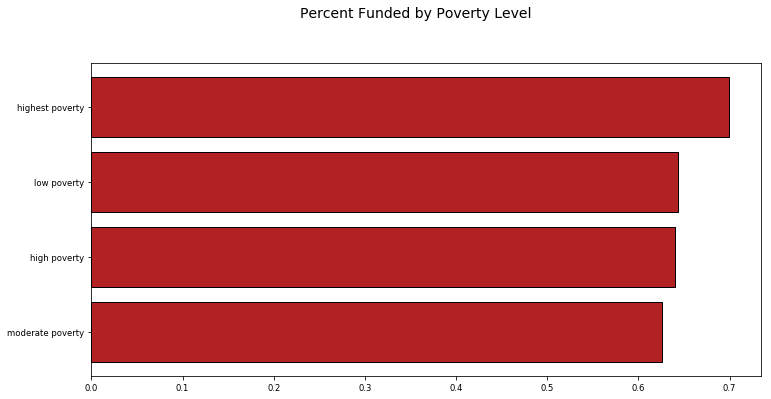

In [61]:
fig = plt.figure(figsize = (12,6))
title = fig.suptitle("Percent Funded by Poverty Level", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel = ("Number of Projects")
ax.set_xlabel = ("Poverty Level")
group_counts = projects.groupby("poverty_level").agg({"percent_funded": np.average})
group_counts.index.name = 'poverty_level'
group_counts.sort_values(['percent_funded'], inplace = True)
group_counts.reset_index(inplace = True)
group_counts = (list(group_counts.poverty_level),list(group_counts.percent_funded))
ax.tick_params(axis = 'both', which = 'major', labelsize = 8.5)
bar = ax.barh(group_counts[0], group_counts[1], color = 'firebrick',
            edgecolor = 'black', linewidth = 1)

## Modeling: Logistic Regression

For this section, I have chosen to model the probability of a project becoming fully funded or not. I have chosen a few variables from the consolidated data set that I believe would lend support for this model. If this model is found to have a high level accuracy, it could be used to help identify and promote other projects that may be overlooked by donors and are at risk of not becoming funded.

This model is somewhat limited, and it does not take into account any text analysis or donor networks that a project might have. Because of this, I believe the predictive capabilites of this model will be limited compared to any models that include these features.
### Data Preparation

The following logistic model will test to see if we can predict if a project will be fully funded by the price (log scaled), number of students reached, resource type, and poverty level for each project. The resource type of Supplies, the Highest Poverty level, and grade of PreK-2 will be used as the baseline variables for the dummy variables, as they are the most prevalent.

In [62]:
pred_data = projects[['funded', 'log_price', 'log_students', 'Other', 'Books',
                      'Technology', 'Trips', 'Visitors', 'high_poverty', 'moderate_poverty', 'low_poverty',
                     'Grades_3_5', 'Grades_6_8', 'Grades_9_12']].copy()

In [63]:
pred_data.describe()

,funded,log_price,log_students,Other,Books,Technology,Trips,Visitors,high_poverty,moderate_poverty,low_poverty,Grades_3_5,Grades_6_8,Grades_9_12
count,"663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00","663,786.00"
mean,0.60,6.01,3.83,0.10,0.21,0.33,0.01,0.00,0.26,0.14,0.03,0.31,0.17,0.15
std,0.49,0.63,1.06,0.31,0.41,0.47,0.09,0.04,0.44,0.34,0.16,0.46,0.38,0.36
min,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,5.59,3.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,6.02,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,6.37,4.61,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
max,1.00,12.99,11.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Using the Statsmodels Package
The model will first be built using statsmodels (which has advantages in interpretability) and then repeated using ScikitLearn

In [64]:
fund_train, fund_test = train_test_split(pred_data, test_size = 0.2, random_state = 65) 

In [65]:
fund_train = fund_train.reset_index(drop = True)
fund_test = fund_test.reset_index(drop = True)

In [66]:
function_call = 'funded ~ ' + ' + '.join(fund_train.columns[1:])
function_call

'funded ~ log_price + log_students + Other + Books + Technology + Trips + Visitors + high_poverty + moderate_poverty + low_poverty + Grades_3_5 + Grades_6_8 + Grades_9_12'

In [67]:
binom_fit = smf.glm(function_call, family = sm.families.Binomial(), data = fund_train).fit()

In [68]:
results = binom_fit.summary()
print(results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 funded   No. Observations:               531028
Model:                            GLM   Df Residuals:                   531014
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4348e+05
Date:                Tue, 25 Sep 2018   Deviance:                   6.8696e+05
Time:                        21:30:48   Pearson chi2:                 5.31e+05
No. Iterations:                     5   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6227      0.031    147.782      0.000       4.561       4.684
log_price           -0.6847      0

In [69]:
np.exp(binom_fit.params)

Intercept                        101.77
log_price                          0.50
log_students                       0.99
Other                              0.89
Books                              1.16
Technology                         0.87
Trips                              1.60
Visitors                           1.35
high_poverty                       0.77
moderate_poverty                   0.75
low_poverty                        0.89
Grades_3_5                         1.02
Grades_6_8                         1.12
Grades_9_12                        1.35
dtype: float64

The fit is not great. Using the quick rule of thumb, the deviance is much higher than chi2 value (and the degrees of freedom which should be roughly the same as the chi2), indicating a poor fit of the model.

An increase in the log price corresponds to a decrease in the log odds ratio of about 50%. It intuitively makes sense that the higher the amount needed the more difficult it will be to get enough donors to fund an activity. The model could be simplified to just funded ~ log_price, we will test this to see if it causes any noticeable changes.

Compared to the baseline level of projects for Supplies, projects for Technology is less likely to succeed, while those involving rest rest increase the odds ratio by about 15-60% when compared to that of Supplies.

The baseline of Highest Poverty is the most successful of the four poverty level, the rest all decrease the odds ratio.

Interestingly, the odds ratio is continually increased as the grade level increases. Perhaps this is due to the students being able to push more to support their cause as they get older.

In [76]:
print(binom_fit.aic)

686985.3716306068


In [77]:
predicted_prob = binom_fit.predict(fund_test)

In [78]:
predicted_thresh = [0 if i < 0.5 else 1 for i in predicted_prob]

In [79]:
pd.DataFrame(confusion_matrix(y_true = fund_test.funded.astype(np.int64), y_pred = predicted_thresh))

,0,1
0,13387,39490
1,10631,69250


In [80]:
fpr, tpr, _ = roc_curve(y_true = fund_test.funded, y_score = predicted_prob)

In [81]:
AUC = auc(x = fpr, y = tpr )

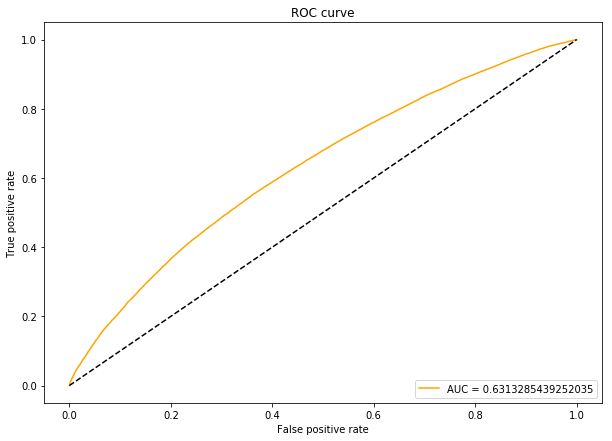

In [82]:
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr,label='AUC = {}'.format(AUC), color = 'orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc="lower right")

The ROC curve confirms that the model is barely better than random chance.

In [83]:
log_loss(y_true = fund_test.funded, y_pred = predicted_prob)

0.6468136286076581

In [84]:
prob = np.linspace(.0001,.9999999,1000)
log_prob = -np.log(prob)

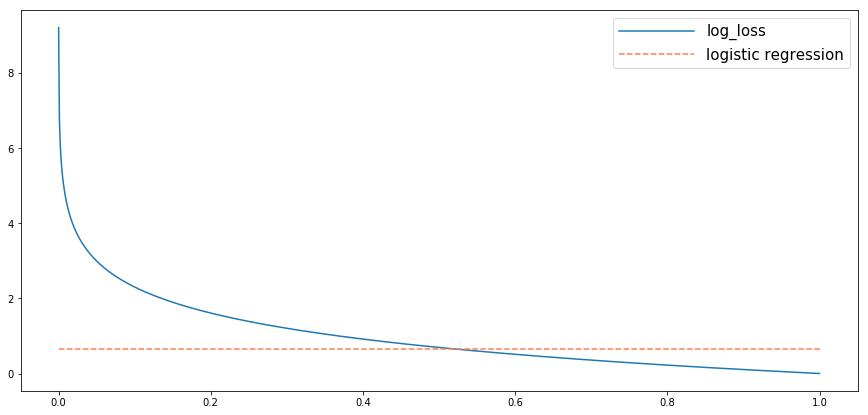

In [85]:
plt.figure(figsize = (15,7))

plt.plot(prob, log_prob,'-')
plt.plot(prob, [log_loss(y_true = fund_test.funded, y_pred = predicted_prob) for i in range(1000)], '--', color = 'coral')
plt.legend(['log_loss','logistic regression'], handlelength = 5, prop = {'size': 15} )

The intercept between the logistic regression model above and the log loss function again shows poor results.

### SKLearn Alternative

In [90]:
x_train, x_test, y_train, y_test = train_test_split(pred_data.iloc[:,1:], pred_data.iloc[:,0], 
                                                    test_size = 0.2, random_state = 65) 

In [91]:
log_reg = LogisticRegression(fit_intercept = True)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
log_reg.intercept_

array([4.62842944])

In [93]:
log_reg.coef_

array([[-0.68553694, -0.00628444, -0.11808154,  0.14820964, -0.14149286,
         0.4672193 ,  0.29178073, -0.26106786, -0.28535356, -0.12017296,
         0.02372694,  0.11545869,  0.29955575]])

Note that SKLearn adds parameter regularization with no way to disable, meaning that the coefficients will be different.

## Additional Questions/Enhancements for Project Partner

The first enhancement that could be added would to add in demographic information for each zip code. This could be extracted from the census. Another enhancement would be to add in some level of NLP to the model to see if the description affects the rate of project funding.

I have the following questions after exploring and modeling the data:

1. What does the 'No Cash Recevied' value mean in the Donor Type column?
2. Is it possible to see any details about the donors themselves? (gender, age, etc)
3. Since the number of users of the platform has likely changed over time, is it possible to get the number of users over time? This would help ensure any analysis is not being biased by the overall increase in use of the platform.